# **Section 4: Pandas**
<a href="https://colab.research.google.com/github/osuranyi/UdemyCourses/blob/main/NumpyStack/Section4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library, which make easy to read, write, and manipulate data.

Contents:
* Read/write CSV
* DataFrames
* Selecting rows and columns
* apply() function
* Plotting

## **21. Loading in data**

Pandas is suitable to read in table format data, e.g. CSV/TSV.

In [ ]:
import pandas as pd

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv

--2021-12-26 00:39:25--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61896 (60K) [text/plain]
Saving to: ‘sbux.csv’

sbux.csv            100%[===================>]  60.45K  --.-KB/s    in 0.007s  

2021-12-26 00:39:26 (8.41 MB/s) - ‘sbux.csv’ saved [61896/61896]



Read in CSV:

In [ ]:
df = pd.read_csv('sbux.csv')
# df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')
# ^ also works with URL

type(df)

pandas.core.frame.DataFrame

This is not a numpy array.

Check what is in the file:

In [ ]:
!head sbux.csv

date,open,high,low,close,volume,Name
2013-02-08,27.92,28.325,27.92,28.185,7146296,SBUX
2013-02-11,28.26,28.26,27.93,28.07,5457354,SBUX
2013-02-12,28.0,28.275,27.975,28.13,8665592,SBUX
2013-02-13,28.23,28.23,27.75,27.915,7022056,SBUX
2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX
2013-02-15,27.805,27.85,27.085,27.17,18195730,SBUX
2013-02-19,27.18,27.305,27.01,27.225,11760912,SBUX
2013-02-20,27.3,27.42,26.59,26.655,12472506,SBUX
2013-02-21,26.535,26.82,26.26,26.675,13896450,SBUX


Doing the same with Pandas

In [ ]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


First 10 rows:

In [ ]:
df.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX
5,2013-02-15,27.805,27.850,27.085,27.170,18195730,SBUX
6,2013-02-19,27.180,27.305,27.010,27.225,11760912,SBUX
7,2013-02-20,27.300,27.420,26.590,26.655,12472506,SBUX
8,2013-02-21,26.535,26.820,26.260,26.675,13896450,SBUX
9,2013-02-22,26.850,27.105,26.640,27.085,11487316,SBUX


Checking the end of the dataframe:

In [ ]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


We can check basic infos as well:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


## **22. Selecting rows and columns**

Analogous to indexing an array. But the usual syntax does not work:

In [ ]:
#df[0,0]

Check columns:

In [ ]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

Change 'Name' to lowercase:

In [ ]:
df.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'name']
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'name'], dtype='object')

Select a column:

In [ ]:
df['open']

0       27.920
1       28.260
2       28.000
3       28.230
4       27.765
         ...  
1254    56.280
1255    55.900
1256    55.530
1257    53.685
1258    55.080
Name: open, Length: 1259, dtype: float64

Selecting multiple columns using a list of column names:

In [ ]:
df[['open','close']]

,open,close
0,27.920,28.185
1,28.260,28.070
2,28.000,28.130
3,28.230,27.915
4,27.765,27.775
...,...,...
1254,56.280,56.000
1255,55.900,55.770
1256,55.530,54.690
1257,53.685,55.610


Check types:

In [ ]:
type(df['open'])

pandas.core.series.Series

In [ ]:
type(df[['open','close']])

pandas.core.frame.DataFrame

One column is a Series, two columns are a DataFrame. Also this notation is counter-intuitive, as e.g. in Numpy, we used square brackets to index rows, not columns.

How do we select a row?

In [ ]:
df.iloc[0]

date      2013-02-08
open           27.92
high          28.325
low            27.92
close         28.185
volume       7146296
name            SBUX
Name: 0, dtype: object

In [ ]:
df.loc[0]

date      2013-02-08
open           27.92
high          28.325
low            27.92
close         28.185
volume       7146296
name            SBUX
Name: 0, dtype: object

iloc selects by int index, whereas loc uses the index 'string'

In [ ]:
df2 = pd.read_csv('sbux.csv', index_col='date')

In [ ]:
df2.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


"date" column became the index, we can select rows by dates using loc:

In [ ]:
df2.loc['2013-02-08']

open        27.92
high       28.325
low         27.92
close      28.185
volume    7146296
Name         SBUX
Name: 2013-02-08, dtype: object

In [ ]:
type(df2.loc['2013-02-08'])


pandas.core.series.Series

It is also a Series. Both individual rows and columns are series.

A powerful tools are logical indices:

In [ ]:
df[df['open'] > 64]

,date,open,high,low,close,volume,name
1087,2017-06-05,64.85,64.870,64.18,64.27,6809284,SBUX
1088,2017-06-06,64.22,64.350,64.05,64.16,5448439,SBUX
1089,2017-06-07,64.13,64.295,63.34,63.50,8364994,SBUX


We are passing a Series containing boolean variables:

In [ ]:
df['open'] > 64

0       False
1       False
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257    False
1258    False
Name: open, Length: 1259, dtype: bool

In [ ]:
type(df['open'] > 64)

pandas.core.series.Series

Comparing with numpy:

In [ ]:
import numpy as np
A = np.arange(10)
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
A[ A%2 == 0]

array([0, 2, 4, 6, 8])

Converting a DataFrame into a Numpy array:

In [ ]:
df.values

array([['2013-02-08', 27.92, 28.325, ..., 28.185, 7146296, 'SBUX'],
       ['2013-02-11', 28.26, 28.26, ..., 28.07, 5457354, 'SBUX'],
       ['2013-02-12', 28.0, 28.275, ..., 28.13, 8665592, 'SBUX'],
       ...,
       ['2018-02-05', 55.53, 56.26, ..., 54.69, 16059955, 'SBUX'],
       ['2018-02-06', 53.685, 56.06, ..., 55.61, 17415065, 'SBUX'],
       ['2018-02-07', 55.08, 55.43, ..., 54.46, 13927022, 'SBUX']],
      dtype=object)

Only select numerical columns:

In [ ]:
A = df[['open','close']].values

In [ ]:
type(A)

numpy.ndarray

This is a Numpy array as expected.

Save DataFrame to file:

In [ ]:
smalldf = df[['open','close']]
smalldf.to_csv('output.csv')

In [ ]:
!head output.csv

,open,close
0,27.92,28.185
1,28.26,28.07
2,28.0,28.13
3,28.23,27.915
4,27.765,27.775
5,27.805,27.17
6,27.18,27.225
7,27.3,26.655
8,26.535,26.675


Get rid of useless index column:

In [ ]:
smalldf.to_csv('output.csv', index=False)

In [ ]:
!head output.csv

open,close
27.92,28.185
28.26,28.07
28.0,28.13
28.23,27.915
27.765,27.775
27.805,27.17
27.18,27.225
27.3,26.655
26.535,26.675


## **23. The apply() function**

Apply an operation on each row or column of a DataFrame.

In [ ]:
def date_to_year(row):
  return int(row['date'].split('-')[0])

df.apply(date_to_year,axis=1)

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
1254    2018
1255    2018
1256    2018
1257    2018
1258    2018
Length: 1259, dtype: int64

We can put these in a new column:

In [ ]:
df['year'] = df.apply(date_to_year,axis=1)
df.head()

,date,open,high,low,close,volume,name,year
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,2013
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,2013
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,2013
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,2013
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,2013


## **24. Plotting with Pandas**

Instance methods for instant plotting.

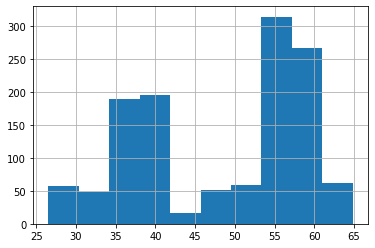

In [ ]:
df['open'].hist();

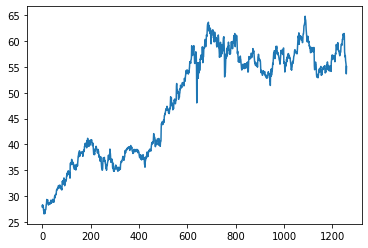

In [ ]:
df['open'].plot();

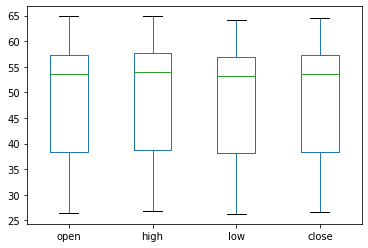

In [ ]:
df[['open','high','low','close']].plot.box();

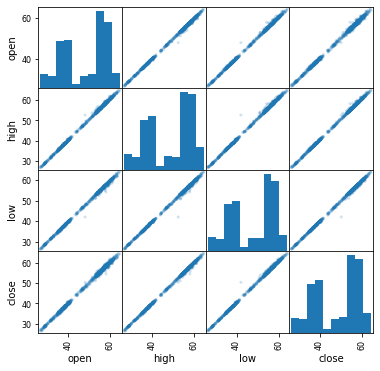

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['open','high','low','close']],alpha=0.2,figsize=(6,6));

## **25. Pandas exercise**

* Generate, plot, and save the ''Donut Dataset'' (concentric circles dataset) with quadratic features
* Create a dataframe with `(x1,x2,y)`
* Add `x1^2, x2^2, x1*x2`
* Save to CSV without header row, index column


First, the Donut:

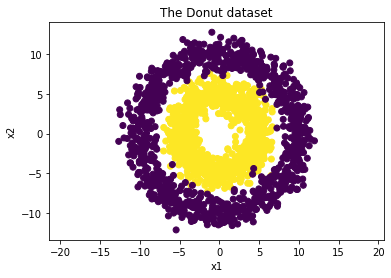

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000

#Set mean radii for the two categories
R1 = 5.0
R2 = 10.0

#Set variance of radii for the two categories
std1 = 1.0
std2 = 1.0

x1 = []
x2 = []
y = []

# Sample radii for both categories
r1 = R1 + std1*np.random.randn(N)
r2 = R2 + std2*np.random.randn(N)

# Sample angles
theta1 = np.random.uniform(0,2*np.pi,N)
theta2 = np.random.uniform(0,2*np.pi,N)

# Going from polar coordinates to cartesian coordinates
x1.extend(r1*np.cos(theta1))
x2.extend(r1*np.sin(theta1))
y.extend(np.ones(N))
x1.extend(r2*np.cos(theta2))
x2.extend(r2*np.sin(theta2))
y.extend(np.zeros(N))

ax = plt.axes(xlabel='x1',ylabel='x2',title='The Donut dataset')
ax.axis('equal') # Setting axis scales equal, so the donut is really circular
plt.scatter(x1,x2,c=y);

Next, creating the Pandas DataFrame:

In [2]:
from matplotlib.font_manager import X11FontDirectories
import pandas as pd

df = pd.DataFrame({'x1':x1,'x2':x2,'y':y})
df.head()

,x1,x2,y
0,-1.157169,4.605890,1.0
1,-3.470980,5.311718,1.0
2,-3.559706,2.542630,1.0
3,4.825418,3.828475,1.0
4,2.050228,-1.059879,1.0


Adding the new features:

In [3]:
df['x1^2'] = df['x1'].mul(df['x1'])
df['x2^2'] = df['x2'].mul(df['x2'])
df['x1*x2'] = df['x1'].mul(df['x2'])
df.head()

,x1,x2,y,x1^2,x2^2,x1*x2
0,-1.157169,4.605890,1.0,1.339039,21.214222,-5.329792
1,-3.470980,5.311718,1.0,12.047704,28.214348,-18.436868
2,-3.559706,2.542630,1.0,12.671509,6.464970,-9.051018
3,4.825418,3.828475,1.0,23.284655,14.657220,18.473990
4,2.050228,-1.059879,1.0,4.203435,1.123343,-2.172993


Saving DataFrame into CSV:

In [4]:
df.to_csv('dataframe.csv',index=False,header=False)
!head dataframe.csv

-1.157168739616149,4.605889959715593,1.0,1.3390394919448267,21.214222321008904,-5.329791879494768
-3.4709802513807584,5.31171797149894,1.0,12.047703905475233,28.21434780874481,-18.436868179977083
-3.559706266290927,2.5426304696111464,1.0,12.671508702270891,6.464969704994998,-9.05101761553704
4.825417638693784,3.8284748381751754,1.0,23.284655387817093,14.657219586540435,18.473990013425823
2.0502279202719293,-1.0598785344567159,1.0,4.203434525062561,1.1233425078021158,-2.172992563440053
1.6214862085625978,-2.5491936660796304,1.0,2.6292175245587086,6.498388347180506,-4.133482372503249
0.7382001612520873,-5.43247971308848,1.0,0.5449394780726077,29.51183583311789,-4.010257400200609
3.4102554135363574,-2.971292126881296,1.0,11.629841985554032,8.828576903266777,-10.132865060894897
-3.162691071743807,1.8256511876625068,1.0,10.002614815287991,3.3330022590135218,-5.773970711338688
5.563705355287538,0.8980662342062556,1.0,30.954817280455227,0.8065229610214052,4.996575916656257
